In [ ]:
import pandas as pd
import re
from sqlalchemy import create_engine

# Database connection setup
db_config = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'kaviyam123',
    'port': '5432'
}
connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

# Step 1: Load data from PostgreSQL
query = 'SELECT * FROM "corrected_merged_claim_data_EF";'
data = pd.read_sql(query, con=engine)

print(data.columns.tolist())

In [ ]:
['Policy Number', 'Policy No', 'Renewal Type', 'Product name ', 'Product name  2', 'biztype', 'Policy End Date', 'Insured name ', 
 'Renewal Notice generation date ', 'Policy Start Date', 'Renewal Policy Start date ', 'Reg no ', 'age', 'Reg Year Bucket 2', 
 'enginenumber', 'CHASSIS NUMBER', 'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location ', 'Vehicle IDV', 
 'Claim in last year', 'Last Year NCB ', 'Renewal NCB', 'NCB Amount', 'OD Prem Post NCB', 'Premium After Discount', 'Nil Depreciation', 
 'Passenger Assist', 'Consumable Cover', 'Engine Safe Cover', 'Road Side Assistance', 'Key Loss', 'Total Add-on with GST', 'Removing GST  in Add-on', 
 'Before GST Add-on GWP', 'Total OD Premium', 'Total TP Premium', 'Premium Before Applicable Tax', 'gst', 'Total Premium Payable ', 'Premium Payable without NCB', 
 'NCB % Previous Year', 'Vehicle Segment', ' New Branch Name', ' New Vertical', 'Zone 3', 'state3', 'Hyundai Discount Status ', 'OEM Discount Category', 
 'Applicable Discount with NCB', 'Applicable Discount without NCB', 'Discount Category  with NCB', 'Add on Eligibilty (5th & 6th Renewals With NCB)', 
 'Month', 'New Branch Name  2', 'Invited Premium', 'Renewed  Premium', 'decline', 'OEM Category', 'Tie Up', 'Zone 2', 'state2', 'booked', 'Booked Date', 
 'Type', 'Data', 'nop', 'Policy Tenure(Check)', 'null_count', 'Cleaned_Insured name', 'Cleaned_New Branch Name 2', 'Cleaned_state2', 'Non_unique_columns', 
 'Claim No', 'Claim No (str)', 'Child Claim No', 'Insured Name', 'CLEANED_INSUREDNAME (Claim)', 'Policy No_claim', 'Policy No (Str)', 'Total Sum Insured (Policy SI)', 
 'Interest Level', 'Product', 'Policy Start Date_claim', 'Policy End Date_claim', 'Policy Issuance Branch', 'Channel', 'Distribution Channel', 'IMD Code', 
 'Intermediary Name', 'Intermediary Branch', 'Loss Date', 'Notification Date', 'Nature of Loss', 'Cause of Loss', 'Status of Claim', 'Updated Status', 
 'Settle date', 'Settled Month', 'Loss Location', 'Claim processing Location', 'Make', 'Model', 'Variant', 'Vehicle Registration No.', 'Engine NO', 
 'Chassis NO', 'Manf. Year', 'DAT_REGISTRATION_DATE', 'Claim Status', 'Number of claims', 'PAID', 'WITHDRAWN', 'CLOSURE OF CLAIM', 'REPUDIATION', 
 'CLOSURE OF CLAIMS', 'Approved', 'Denied', 'con (Claim)', 'CustomerID_Base', 'CustomerID', 'Policy Status', 'Policy Tenure Month', 'Policy Tenure', 
 'Start Year', 'End Year', 'Cumulative Tenure (Months)', 'Tenure Decimal', 'Customer Tenure', 'FirstPolicyYear', 'New_Customer_ID', 'New Customers', 
 'Churn Label', 'Claim Happaned/Not', 'Renewal Rate Status']

In [ ]:
['Policy No', 'Renewal Type', 'Product name ', 'Product name  2', 'biztype', 'Policy End Date', 'Policy Start Date', 'Reg no ', 'age', 
 'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location ', 'Vehicle IDV', 'NCB Amount', 'Before GST Add-on GWP', 
 'Total OD Premium', 'Total TP Premium', 'gst', 'Total Premium Payable ', 'NCB % Previous Year', 'Vehicle Segment', 
 'Applicable Discount with NCB', 'Tie Up', 'Zone 2', 'state2', 'Cleaned_Insured name', 'Cleaned_New Branch Name 2', 'Cleaned_state2',
 'Number of claims', 'Approved', 'Denied', 'CustomerID', 'Policy Status', 'Policy Tenure', 'Customer Tenure', 'New Customers', 
 'Churn Label', 'Claim Happaned/Not', 'Renewal Rate Status']

In [ ]:
['Policy Number', 'Policy No', 'Renewal Type', 'Product name', 'Product name  2', 'biztype', 'Policy End Date', 'Insured name', 
 'Renewal Notice generation date', 'Policy Start Date', 'Renewal Policy Start date', 'Reg no', 'age', 'Reg Year Bucket 2', 
 'enginenumber', 'CHASSIS NUMBER', 'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location', 'Vehicle IDV', 
 'Claim in last year', 'Last Year NCB', 'Renewal NCB', 'NCB Amount', 'OD Prem Post NCB', 'Premium After Discount', 'Nil Depreciation', 
 'Passenger Assist', 'Consumable Cover', 'Engine Safe Cover', 'Road Side Assistance', 'Key Loss', 'Total Add-on with GST', 
 'Removing GST  in Add-on', 'Before GST Add-on GWP', 'Total OD Premium', 'Total TP Premium', 'Premium Before Applicable Tax', 
 'gst', 'Total Premium Payable', 'Premium Payable without NCB', 'NCB % Previous Year', 'Vehicle Segment', 'New Branch Name', 
 'New Vertical', 'Zone 3', 'state3', 'Hyundai Discount Status', 'OEM Discount Category', 'Applicable Discount with NCB', 
 'Applicable Discount without NCB', 'Discount Category  with NCB', 'Add on Eligibilty (5th & 6th Renewals With NCB)', 'Month', 
 'New Branch Name  2', 'Invited Premium', 'Renewed  Premium', 'decline', 'OEM Category', 'Tie Up', 'Zone 2', 'state2', 'booked', 
 'Booked Date', 'Type', 'null_count', 'Match', 'Cleaned_Insured name', 'CustomerID_Base', 'CustomerID', 'Policy Status', 
 'Policy Tenure Month', 'Policy Tenure', 'Start Year', 'End Year', 'Cumulative Tenure (Months)', 'Tenure Decimal', 'Customer Tenure', 
 'FirstPolicyYear', 'New_Customer_ID', 'New Customers', 'Churn Label', 'Renewal Rate Status']


In [ ]:
'Policy No',  'Renewal Type', 'Product name', 'Product name  2', 'biztype', 'Policy End Date', 'Policy Start Date', 'Reg no', 'age', 
'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location', 'Before GST Add-on GWP',  'Total OD Premium', 'Total TP Premium',
'gst', 'Total Premium Payable', 'NCB % Previous Year', 'Vehicle Segment', 'Applicable Discount with NCB', 'New Branch Name  2', 'decline',
'Tie Up', 'Zone 2', 'state2', 'Cleaned_Insured name', 'CustomerID', 'Policy Status', 'Policy Tenure', 'Customer Tenure', 'New Customers', 'Churn Label', 
'Renewal Rate Status', 'Claim in last year', 'Number of Claims'

In [ ]:
'Policy No', 'Policy End Date', 'Policy Start Date', 'Before GST Add-on GWP',  'Total OD Premium', 'Total TP Premium',
'gst', 'Total Premium Payable', 'NCB % Previous Year', 'Applicable Discount with NCB', 'New Branch Name  2', 'decline',
'Tie Up', 'Zone 2', 'state2', 'Cleaned_Insured name', 'CustomerID', 'Policy Status', 'Policy Tenure', 'Customer Tenure', 'New Customers', 'Churn Label', 
'Renewal Rate Status', 'Claim in last year', 'Number of Claims'

In [ ]:
['Policy Number', 'Policy No', 'Renewal Type', 'Product name ', 'Product name  2', 'biztype', 'Policy End Date', 'Insured name ', 
 'Renewal Notice generation date ', 'Policy Start Date', 'Renewal Policy Start date ', 'Reg no ', 'age', 'Reg Year Bucket 2', 'enginenumber', 
 'CHASSIS NUMBER', 'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location ', 'Vehicle IDV', 'Claim in last year', 'Last Year NCB ', 
 'Renewal NCB', 'NCB Amount', 'OD Prem Post NCB', 'Premium After Discount', 'Nil Depreciation', 'Passenger Assist', 'Consumable Cover', 'Engine Safe Cover', 
 'Road Side Assistance', 'Key Loss', 'Total Add-on with GST', 'Removing GST  in Add-on', 'Before GST Add-on GWP', 'Total OD Premium', 'Total TP Premium', 
 'Premium Before Applicable Tax', 'gst', 'Total Premium Payable ', 'Premium Payable without NCB', 'NCB % Previous Year', 'Vehicle Segment', ' New Branch Name', 
 ' New Vertical', 'Zone 3', 'state3', 'Hyundai Discount Status ', 'OEM Discount Category', 'Applicable Discount with NCB', 'Applicable Discount without NCB', 
 'Discount Category  with NCB', 'Add on Eligibilty (5th & 6th Renewals With NCB)', 'Month', 'New Branch Name  2', 'Invited Premium', 'Renewed  Premium', 'decline', 
 'OEM Category', 'Tie Up', 'Zone 2', 'state2', 'booked', 'Booked Date', 'Type', 'Data', 'nop', 'Policy Tenure(Check)', 'null_count', 'Cleaned_Insured name', 
 'Cleaned_New Branch Name 2', 'Cleaned_state2', 'Non_unique_columns', 'Claim No', 'Claim No (str)', 'Child Claim No', 'Insured Name', 'CLEANED_INSUREDNAME (Claim)', 
 'Policy No_claim', 'Policy No (Str)', 'Total Sum Insured (Policy SI)', 'Interest Level', 'Product', 'Policy Start Date_claim', 'Policy End Date_claim', 
 'Policy Issuance Branch', 'Channel', 'Distribution Channel', 'IMD Code', 'Intermediary Name', 'Intermediary Branch', 'Loss Date', 'Notification Date', 'Nature of Loss', 
 'Cause of Loss', 'Status of Claim', 'Updated Status', 'Settle date', 'Settled Month', 'Loss Location', 'Claim processing Location', 'Make', 'Model', 'Variant', 
 'Vehicle Registration No.', 'Engine NO', 'Chassis NO', 'Manf. Year', 'DAT_REGISTRATION_DATE', 'Claim Status', 'Number of claims', 'PAID', 'WITHDRAWN', 'CLOSURE OF CLAIM', 
 'REPUDIATION', 'CLOSURE OF CLAIMS', 'Approved', 'Denied', 'con (Claim)', 'CustomerID_Base', 'CustomerID', 'Policy Status', 'Policy Tenure Month', 'Policy Tenure', 'Start Year', 
 'End Year', 'Cumulative Tenure (Months)', 'Tenure Decimal', 'Customer Tenure', 'FirstPolicyYear', 'New_Customer_ID', 'New Customers', 'Churn Label', 'Claim Happaned/Not', 
 'Renewal Rate Status', 'Overall Churned']

In [ ]:
['Policy No', 'Policy End Date', 'Policy Start Date', 'Vehicle IDV', 'Before GST Add-on GWP', 'Total OD Premium', 'Total TP Premium', 
 'gst', 'Total Premium Payable ', 'NCB % Previous Year', 'Applicable Discount with NCB', 'Number of claims', 'Approved', 'Denied', 'CustomerID', 'Policy Status', 
 'Policy Tenure', 'Customer Tenure', 'Churn Label', 'Claim Happaned/Not', 
 'Renewal Rate Status', 'Overall Churned']

In [1]:
import pandas as pd
import re
from sqlalchemy import create_engine

# Database connection setup
db_config = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'kaviyam123',
    'port': '5432'
}
connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

# Step 1: Load data from PostgreSQL
query = 'SELECT * FROM public.overall_cleaned_base_and_pr_ef_policyef;'
data = pd.read_sql(query, con=engine)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16800\4152844982.py:26: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16800\4152844982.py:26: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16800\4152844982.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16800\4152844982.py:26: UserWarning: Could not infer format, so each elemen

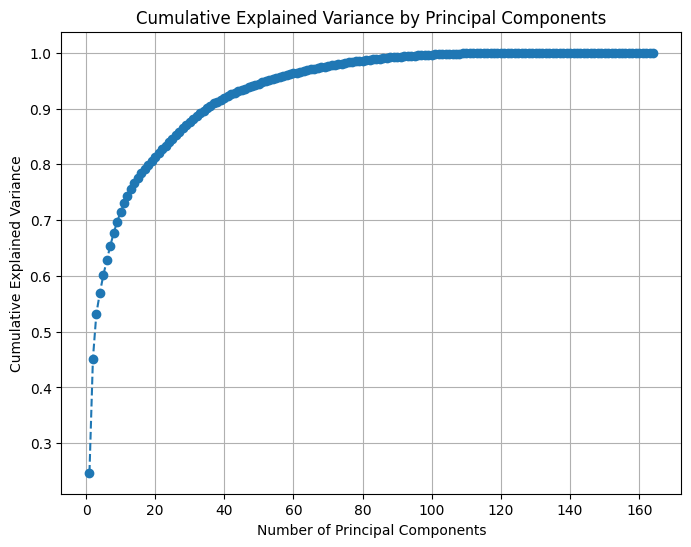

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Ensure 'Policy Status' is stored before exclusion
if 'Policy Status' in data.columns:
    target = data['Policy Status'].copy()  # Store it safely
else:
    raise ValueError("'Policy Status' is missing from the dataset.")

# Columns to exclude from PCA
columns_to_exclude = ['policy no', 'product name', 'product name 2',  'biztype', 'policy end date', 'policy start date', 'renewal type', 'tie up', 'vehicle segment',
 'age', 'manufacturer/make', 'model', 'variant', 'fuel type', 'rto location', 'vehicle idv', 'ncb amount', 
 'before gst add-on gwp', 'total od premium', 'total tp premium', 'gst', 'total premium payable', 
 'ncb % previous year', 'applicable discount with ncb', 'Cleaned Branch Name 2', 'Cleaned State2', 'Cleaned Zone 2', 
 'Number of claims', 'approved', 'denied', 'customerid', 'Policy Status', 'Policy Tenure Month', 'Policy Tenure', 'Customer Tenure', 'New Customers', 'Claim Happaned/Not', 
 'Renewal Rate Status', 'withdrawn', 'Cleaned Chassis Number', 'Cleaned Engine Number', 'Cleaned Reg no', 'corrected_name', 'updated_old_policy_no',
  'new_chain_flag', 'chain_group', 'first_initial_policy_no', 'policy_wise_purchase', 'cleaned new vertical', 'Overall Churned', 'Churn Label']


# Identify date columns by checking for columns that could represent dates
date_columns = [col for col in data.columns if 'date' in col.lower()]
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Extract year, month, and day as separate features for all identified date columns
new_date_cols = {}
for col in date_columns:
    new_date_cols[f'{col}_YEAR'] = data[col].dt.year.fillna(0).astype(int)
    new_date_cols[f'{col}_MONTH'] = data[col].dt.month.fillna(0).astype(int)
    new_date_cols[f'{col}_DAY'] = data[col].dt.day.fillna(0).astype(int)

# Use pd.concat to add these new columns efficiently
data = pd.concat([data, pd.DataFrame(new_date_cols)], axis=1)

# Drop the original date columns after extracting year, month, and day
data = data.drop(date_columns, axis=1)

# Handle missing values
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna('missing')
    else:
        data[column] = data[column].fillna(0)

# Label encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Filter out the columns to exclude
columns_for_pca = [col for col in data.columns if col not in columns_to_exclude]
data_for_pca = data[columns_for_pca]

# Standardize the data for PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Perform PCA with all components
pca = PCA()
pca.fit(data_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [3]:
# Choose the number of principal components based on explained variance plot
n_components = 40  # Adjust based on desired variance retention
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Re-add the 'Policy Status' back from stored target
pca_df['Policy Status'] = target.values

# Save PCA results to CSV
pca_df.to_csv('pca_result_reduced_unwanted_40.csv', index=False)

# Feature Importance Calculation
original_feature_names = data_for_pca.columns  # Use columns from the actual PCA input data
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute absolute contribution and sum across all components
feature_importance = pca_components.abs().sum(axis=0)

# Convert to DataFrame and sort
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save feature importance results to CSV
sorted_feature_importance.to_csv('pca_feature_importance_summed_unwanted_40.csv', index=True)

# Print top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                                                  Total Contribution
add on eligibilty (5th & 6th renewals with ncb)            4.011770
chassis_engine_key                                         3.888425
enginenumber                                               3.795331
new vertical                                               3.782979
Trim Policy No                                             3.479361
current year ncb (amount)                                  3.425793
new branch name 2                                          3.345353
old policy no                                              3.303975
oem discount category                                      3.236705
hyundai discount status                                    3.223227


In [4]:
# Choose the number of principal components based on explained variance plot
n_components = 30  # Adjust based on desired variance retention
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Re-add the 'Policy Status' back from stored target
pca_df['Policy Status'] = target.values

# Save PCA results to CSV
pca_df.to_csv('pca_result_reduced_unwanted_30.csv', index=False)

# Feature Importance Calculation
original_feature_names = data_for_pca.columns  # Use columns from the actual PCA input data
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute absolute contribution and sum across all components
feature_importance = pca_components.abs().sum(axis=0)

# Convert to DataFrame and sort
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save feature importance results to CSV
sorted_feature_importance.to_csv('pca_feature_importance_summed_unwanted_30.csv', index=True)

# Print top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                                                  Total Contribution
chassis_engine_key                                         3.061188
old policy no                                              2.885530
name_similarity                                            2.844413
new vertical                                               2.820861
add on eligibilty (5th & 6th renewals with ncb)            2.635276
new branch name 2                                          2.599374
oem discount category                                      2.595056
hyundai discount status                                    2.521191
null_count                                                 2.453938
repudiation                                                2.400309


In [5]:
# Choose the number of principal components based on explained variance plot
n_components = 35  # Adjust based on desired variance retention
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Re-add the 'Policy Status' back from stored target
pca_df['Policy Status'] = target.values

# Save PCA results to CSV
pca_df.to_csv('pca_result_reduced_unwanted_35.csv', index=False)

# Feature Importance Calculation
original_feature_names = data_for_pca.columns  # Use columns from the actual PCA input data
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute absolute contribution and sum across all components
feature_importance = pca_components.abs().sum(axis=0)

# Convert to DataFrame and sort
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save feature importance results to CSV
sorted_feature_importance.to_csv('pca_feature_importance_summed_unwanted_35.csv', index=True)

# Print top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                                                  Total Contribution
new vertical                                               3.617533
chassis_engine_key                                         3.569264
enginenumber                                               3.529221
add on eligibilty (5th & 6th renewals with ncb)            3.395827
old policy no                                              3.132545
current year ncb (amount)                                  3.052033
name_similarity                                            3.016513
oem discount category                                      2.981775
Trim Policy No                                             2.955052
hyundai discount status                                    2.921070


In [6]:
# Choose the number of principal components based on explained variance plot
n_components = 50  # Adjust based on desired variance retention
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Re-add the 'Policy Status' back from stored target
pca_df['Policy Status'] = target.values

# Save PCA results to CSV
pca_df.to_csv('pca_result_reduced_unwanted_50.csv', index=False)

# Feature Importance Calculation
original_feature_names = data_for_pca.columns  # Use columns from the actual PCA input data
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute absolute contribution and sum across all components
feature_importance = pca_components.abs().sum(axis=0)

# Convert to DataFrame and sort
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save feature importance results to CSV
sorted_feature_importance.to_csv('pca_feature_importance_summed_unwanted_50.csv', index=True)

# Print top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                                                  Total Contribution
add on eligibilty (5th & 6th renewals with ncb)            5.106750
reg no                                                     4.484183
Trim Policy No                                             4.359320
enginenumber                                               4.102920
chassis_engine_key                                         4.101607
current year ncb (amount)                                  4.078376
null_count                                                 4.037340
premium payable without ncb                                4.001834
new vertical                                               4.001524
month                                                      3.840480


In [7]:
# Choose the number of principal components based on explained variance plot
n_components = 60  # Adjust based on desired variance retention
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Re-add the 'Policy Status' back from stored target
pca_df['Policy Status'] = target.values

# Save PCA results to CSV
pca_df.to_csv('pca_result_reduced_unwanted_60.csv', index=False)

# Feature Importance Calculation
original_feature_names = data_for_pca.columns  # Use columns from the actual PCA input data
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute absolute contribution and sum across all components
feature_importance = pca_components.abs().sum(axis=0)

# Convert to DataFrame and sort
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save feature importance results to CSV
sorted_feature_importance.to_csv('pca_feature_importance_summed_unwanted_60.csv', index=True)

# Print top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                                                  Total Contribution
add on eligibilty (5th & 6th renewals with ncb)            5.566144
current year ncb (amount)                                  5.059281
reg no                                                     4.975751
Trim Policy No                                             4.660563
month                                                      4.655314
renewal notice generation date_MONTH                       4.602286
current year ncb (%)                                       4.575517
reg year bucket 2                                          4.561804
null_count                                                 4.543461
road side assistance taken                                 4.441299


In [8]:
# Choose the number of principal components based on explained variance plot
n_components = 20  # Adjust based on desired variance retention
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Re-add the 'Policy Status' back from stored target
pca_df['Policy Status'] = target.values

# Save PCA results to CSV
pca_df.to_csv('pca_result_reduced_unwanted_20.csv', index=False)

# Feature Importance Calculation
original_feature_names = data_for_pca.columns  # Use columns from the actual PCA input data
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute absolute contribution and sum across all components
feature_importance = pca_components.abs().sum(axis=0)

# Convert to DataFrame and sort
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save feature importance results to CSV
sorted_feature_importance.to_csv('pca_feature_importance_summed_unwanted_20.csv', index=True)

# Print top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                          Total Contribution
chassis_engine_key                 2.251275
new branch name 2                  1.980257
Trim Policy No                     1.868932
reg no                             1.801121
hyundai discount status            1.787231
oem discount category              1.768052
premium after discount             1.750583
state2                             1.737037
null_count                         1.669125
Policy Tenure(check)               1.668859


In [9]:
# Choose the number of principal components based on explained variance plot
n_components = 25  # Adjust based on desired variance retention
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

# Convert PCA result to a DataFrame
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

# Re-add the 'Policy Status' back from stored target
pca_df['Policy Status'] = target.values

# Save PCA results to CSV
pca_df.to_csv('pca_result_reduced_unwanted_25.csv', index=False)

# Feature Importance Calculation
original_feature_names = data_for_pca.columns  # Use columns from the actual PCA input data
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)

# Compute absolute contribution and sum across all components
feature_importance = pca_components.abs().sum(axis=0)

# Convert to DataFrame and sort
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save feature importance results to CSV
sorted_feature_importance.to_csv('pca_feature_importance_summed_unwanted_25.csv', index=True)

# Print top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                                                  Total Contribution
chassis_engine_key                                         2.774337
old policy no                                              2.305630
new branch name 2                                          2.154392
Trim Policy No                                             2.043226
add on eligibilty (5th & 6th renewals with ncb)            1.978203
hyundai discount status                                    1.973441
oem discount category                                      1.947087
reg no                                                     1.915133
Policy Tenure(check)                                       1.914802
null_count                                                 1.913781


In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import re
from sqlalchemy import create_engine

# Database connection setup
db_config = {
    'host': 'localhost',
    'database': 'postgres',
    'user': 'postgres',
    'password': 'kaviyam123',
    'port': '5432'
}
connection_string = f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"
engine = create_engine(connection_string)

# Step 1: Load data from PostgreSQL
query = 'SELECT * FROM public.overall_cleaned_base_and_pr_ef_policyef;'
data = pd.read_sql(query, con=engine)

In [ ]:
data.columns.values

C:\Users\Admin\AppData\Local\Temp\ipykernel_16800\262027481.py:21: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16800\262027481.py:21: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16800\262027481.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_16800\262027481.py:21: UserWarning: Could not infer format, so each element wi

LDA transformed data saved as 'lda_transformed_data.csv'.
Feature importance saved as 'lda_feature_importance.csv'.


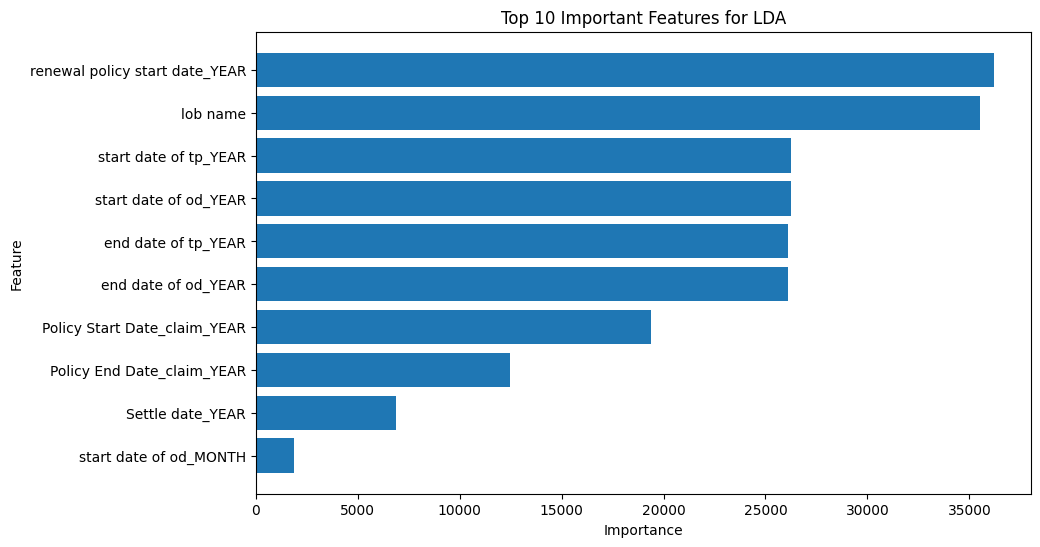

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Columns to exclude from PCA
columns_to_exclude = ['policy no', 'product name', 'product name 2',  'biztype', 'policy end date', 'policy start date', 'renewal type', 'tie up', 'vehicle segment',
 'age', 'manufacturer/make', 'model', 'variant', 'fuel type', 'rto location', 'vehicle idv', 'ncb amount', 
 'before gst add-on gwp', 'total od premium', 'total tp premium', 'gst', 'total premium payable', 
 'ncb % previous year', 'applicable discount with ncb', 'Cleaned Branch Name 2', 'Cleaned State2', 'Cleaned Zone 2', 
 'Number of claims', 'approved', 'denied', 'customerid', 'Policy Status', 'Policy Tenure Month', 'Policy Tenure', 'Customer Tenure', 'New Customers', 'Claim Happaned/Not', 
 'Renewal Rate Status', 'withdrawn', 'Cleaned Chassis Number', 'Cleaned Engine Number', 'Cleaned Reg no', 'corrected_name', 'updated_old_policy_no',
  'new_chain_flag', 'chain_group', 'first_initial_policy_no', 'policy_wise_purchase', 'cleaned new vertical', 'Overall Churned', 'Churn Label']


# Identify date columns by checking for columns that could represent dates
date_columns = [col for col in data.columns if 'date' in col.lower()]
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Extract year, month, and day as separate features for all identified date columns
new_date_cols = {}
for col in date_columns:
    new_date_cols[f'{col}_YEAR'] = data[col].dt.year.fillna(0).astype(int)
    new_date_cols[f'{col}_MONTH'] = data[col].dt.month.fillna(0).astype(int)
    new_date_cols[f'{col}_DAY'] = data[col].dt.day.fillna(0).astype(int)

# Use pd.concat to add these new columns efficiently
data = pd.concat([data, pd.DataFrame(new_date_cols)], axis=1)

# Drop the original date columns after extracting year, month, and day
data = data.drop(date_columns, axis=1)

# Handle missing values
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna('missing')
    else:
        data[column] = data[column].fillna(0)

# Label encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate target column 'Policy Status'
if 'Policy Status' in data.columns:
    target = data['Policy Status']
    data = data.drop(columns=['Policy Status'])
else:
    raise ValueError("⚠️ 'Policy Status' column is missing. Ensure it is present in the dataset.")

# Filter out excluded columns for PCA/LDA
columns_for_pca = [col for col in data.columns if col not in columns_to_exclude]
data_for_pca = data[columns_for_pca]

# Standardize the numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Determine number of components for LDA
n_classes = target.nunique()
n_features = data_scaled.shape[1]
n_components = min(n_classes - 1, n_features)  # LDA max components = min(classes - 1, features)

# Apply LDA
lda = LDA(n_components=n_components)
principal_components = lda.fit_transform(data_scaled, target)

# Convert LDA result to DataFrame
lda_df = pd.DataFrame(principal_components, columns=[f'LD{i+1}' for i in range(n_components)])
lda_df['Policy Status'] = target.values  # Add back the target column

# Save LDA-transformed dataset
lda_df.to_csv('lda_transformed_data_uw.csv', index=False)
print("LDA transformed data saved as 'lda_transformed_data.csv'.")


# Extract feature names (must match data_scaled shape)
feature_names = data_for_pca.columns

# Extract LDA coefficients
lda_coefficients = lda.coef_

# Compute absolute sum of LDA coefficients for importance ranking
feature_importance = np.abs(lda_coefficients).sum(axis=0)

# Create DataFrame of feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

# Save feature importance to CSV
sorted_feature_importance.to_csv('lda_feature_importance_uw.csv', index=False)
print("Feature importance saved as 'lda_feature_importance.csv'.")


# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importance['Feature'].head(10), sorted_feature_importance['Importance'].head(10))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features for LDA')
plt.gca().invert_yaxis()
plt.show()